In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor

# Increase the print output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### PROBLEM STATEMENT

This case study is to predict the taxi fare for a taxi ride in New York City from a given pickup point to the agreed dropoff location. Decision tree and Random Forest regressor is used for the fare prediction.

### DATA DEFINITION

**unique_id**: Unique identifier or key for each record in the dataset - (string)    

**date_time_of_pickup**: time when the ride started - (timestamp)

**longitude_of_pickup**: Longitude of the taxi ride pickup point - (float) - (Numerical) 
 
**latitude_of_pickup**: Latitude of the taxi ride pickup point - (float) - (Numerical)
    
**longitude__of_dropoff**: Longitude of the taxi ride dropoff point  - (float) - (Numerical)
    
**latitude_of_dropoff**: Latitude of the taxi ride dropoff point - (float) - (Numerical)
    
**no_of_passenger**: count of the passengers during the ride - (integer) - (Numerical)
    
**amount**: (target variable)dollar amount of the cost of the taxi ride

In [2]:
# Set working directory
os.chdir("C:/Users/rahul/Documents/IMR/PGDA/Datasets/Random_Forest")

# Read in the data
fullRaw = pd.read_csv("TaxiFare.csv")

In [3]:
fullRaw.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


### BASIC DATA CHECKS/ QUALITY CHECKS

In [4]:
# Check the total rows
print(fullRaw.shape)

# Check the data types for variables
# fullRaw.dtypes

fullRaw.info()

(50000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


1. Categorical to Datetime correction of date_time_of_pickup column

2. Remove unique_id column

In [5]:
# 1. Categorical to Datetime correction of date_time_of_pickup column

fullRaw["date_time_of_pickup"] = pd.to_datetime(fullRaw["date_time_of_pickup"])
fullRaw.dtypes

# datetime64[ns, UTC] stores the time along with date information. "ns" is nanosecond, UTC is basically GMT.

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [6]:
fullRaw.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
# 2. Remove unique_id column
fullRaw.drop("unique_id", axis = 1, inplace = True)
fullRaw.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


#### Missing Values Check

In [8]:
fullRaw.isna().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

### RANDOM SAMPLING

In [9]:
# Randomly Sample Raw Data into Training and Testing. train_test_split() is used for random sampling

trainRaw, testRaw = train_test_split(fullRaw, train_size=0.75, random_state = 150)
# random_state ensures reproducibility of same random results. Any number of your choice would work, I have taken 150.

print(trainRaw.shape)
print(testRaw.shape)

(37500, 7)
(12500, 7)


In [10]:
# Create Source Column in all the datasets. It helps in keeping track of which rows belong to which source of data.

trainRaw = trainRaw.copy()
testRaw = testRaw.copy()

trainRaw["Source"] = "Train"
testRaw["Source"] = "Test"

In [11]:
trainRaw.head()
# testRaw.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Source
15187,7.0,2014-01-01 16:18:10+00:00,-73.982478,40.751692,-73.995197,40.731588,1,Train
49026,45.0,2009-10-05 15:46:00+00:00,-73.971218,40.759837,-73.791723,40.644835,1,Train
118,32.5,2012-05-11 15:03:53+00:00,-73.872862,40.774105,-73.970593,40.764393,2,Train
46090,12.5,2012-10-10 19:26:09+00:00,-73.988796,40.736502,-73.956793,40.766549,1,Train
31430,6.9,2010-08-20 08:53:18+00:00,-73.984922,40.768653,-73.966285,40.764993,1,Train


In [12]:
# Combine Train, Test, Prediction
fullRaw = pd.concat([trainRaw, testRaw], axis = 0)
fullRaw.shape

(50000, 8)

In [13]:
fullRaw.head()
fullRaw.tail()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Source
13806,8.1,2009-04-08 00:31:00+00:00,-73.999960,40.720667,-73.995825,40.691527,1,Test
39640,9.3,2010-11-12 09:44:00+00:00,-73.994375,40.750688,-73.981453,40.757875,1,Test
39928,5.5,2013-11-08 13:02:25+00:00,-73.981353,40.781051,-73.983371,40.771366,1,Test
28363,28.1,2012-08-06 20:59:00+00:00,-73.874473,40.774002,-73.991550,40.762142,1,Test
10791,8.5,2010-08-08 06:54:00+00:00,-73.980015,40.745693,-73.991803,40.749562,5,Test


### DATA PREPARATION

1. Extract "date time" components from date_time_of_pickup
2. Extract appropriate distance travelled using latitude-longitude informtion using "Haversine" distance formula
3. Eliminate some anamolous data based on certain "Domain" logic

#### 1. Extract "date time" components from date_time_of_pickup

In [14]:
# Extract various date time components as seperate indep variables
fullRaw = fullRaw.assign(hour = fullRaw["date_time_of_pickup"].dt.hour, 
                         dayOfTheMonth = fullRaw["date_time_of_pickup"].dt.day,
                        month = fullRaw["date_time_of_pickup"].dt.month, 
                        dayOfTheWeek = fullRaw["date_time_of_pickup"].dt.dayofweek)

# Remove date_time_of_pickup
fullRaw.drop("date_time_of_pickup", axis = 1, inplace = True)

fullRaw.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Source,hour,dayOfTheMonth,month,dayOfTheWeek
15187,7.0,-73.982478,40.751692,-73.995197,40.731588,1,Train,16,1,1,2
49026,45.0,-73.971218,40.759837,-73.791723,40.644835,1,Train,15,5,10,0
118,32.5,-73.872862,40.774105,-73.970593,40.764393,2,Train,15,11,5,4
46090,12.5,-73.988796,40.736502,-73.956793,40.766549,1,Train,19,10,10,2
31430,6.9,-73.984922,40.768653,-73.966285,40.764993,1,Train,8,20,8,4


In [15]:
# Lets convert some of the "continuous" variables like dayOfTheWeek, month to "cotegorical" variables. It makes more sense.
# You can check whether the dayOfTheWeek and month columns start from 0 or 1 by using describe()

# Pandas considers: Monday=0, Sunday=6 (https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.htmls)
# Step 1: Create dayOfTheWeek dictionary
dayOfTheWeek = {
            0 : "Monday", 
            1 : "Tuesday", 
            2 : "Wednesday", 
            3 : "Thursday", 
            4 : "Friday",
            5 : "Saturday", 
            6 : "Sunday"          
         }

# Step 2: Perform replacement
fullRaw["dayOfTheWeek"].replace(dayOfTheWeek, inplace = True)

# Step 3: Vaildate
fullRaw.head()


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Source,hour,dayOfTheMonth,month,dayOfTheWeek
15187,7.0,-73.982478,40.751692,-73.995197,40.731588,1,Train,16,1,1,Wednesday
49026,45.0,-73.971218,40.759837,-73.791723,40.644835,1,Train,15,5,10,Monday
118,32.5,-73.872862,40.774105,-73.970593,40.764393,2,Train,15,11,5,Friday
46090,12.5,-73.988796,40.736502,-73.956793,40.766549,1,Train,19,10,10,Wednesday
31430,6.9,-73.984922,40.768653,-73.966285,40.764993,1,Train,8,20,8,Friday


In [16]:
# Step 1: Create month dictionary
month = {
            1 : "Jan", 
            2 : "Feb", 
            3 : "Mar", 
            4 : "Apr", 
            5 : "May",
            6 : "Jun", 
            7 : "Jul",
            8 : "Aug", 
            9 : "Sep", 
            10 : "Oct", 
            11 : "Nov", 
            12 : "Dec"
         }

# Step 2: Perform replacement
fullRaw["month"].replace(month, inplace = True)

# Step 3: Vaildate
fullRaw.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Source,hour,dayOfTheMonth,month,dayOfTheWeek
15187,7.0,-73.982478,40.751692,-73.995197,40.731588,1,Train,16,1,Jan,Wednesday
49026,45.0,-73.971218,40.759837,-73.791723,40.644835,1,Train,15,5,Oct,Monday
118,32.5,-73.872862,40.774105,-73.970593,40.764393,2,Train,15,11,May,Friday
46090,12.5,-73.988796,40.736502,-73.956793,40.766549,1,Train,19,10,Oct,Wednesday
31430,6.9,-73.984922,40.768653,-73.966285,40.764993,1,Train,8,20,Aug,Friday


#### 2. Extract appropriate distance travelled using latitude-longitude informtion using "Haversine" distance formula

In [17]:
# https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c # 6367 is radius of earth in kilometers.
    return km

fullRaw["distance"] = haversine_np(fullRaw["longitude_of_pickup"], fullRaw["latitude_of_pickup"],
                                   fullRaw["longitude_of_dropoff"], fullRaw["latitude_of_dropoff"])

fullRaw.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Source,hour,dayOfTheMonth,month,dayOfTheWeek,distance
15187,7.0,-73.982478,40.751692,-73.995197,40.731588,1,Train,16,1,Jan,Wednesday,2.477458
49026,45.0,-73.971218,40.759837,-73.791723,40.644835,1,Train,15,5,Oct,Monday,19.798448
118,32.5,-73.872862,40.774105,-73.970593,40.764393,2,Train,15,11,May,Friday,8.295557
46090,12.5,-73.988796,40.736502,-73.956793,40.766549,1,Train,19,10,Oct,Wednesday,4.290327
31430,6.9,-73.984922,40.768653,-73.966285,40.764993,1,Train,8,20,Aug,Friday,1.620422


In [18]:
# Lets do a simple check of what range is currently present in the various variables
fullRaw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000
hour,50000.0,13.489080,6.506935,0.000000,9.000000,14.000000,19.000000,23.000000
dayOfTheMonth,50000.0,15.672040,8.660789,1.000000,8.000000,16.000000,23.000000,31.000000
distance,50000.0,18.497326,355.341070,0.000000,1.222378,2.118783,3.893124,8662.376766


In [19]:
# A. Amount < 2.5 as the minimum fare in NYC is $2.5

print(fullRaw["amount"].describe())
fullRaw = fullRaw[fullRaw["amount"] >= 2.5]
print(fullRaw["amount"].describe())

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64
count    49990.000000
mean        11.366813
std          9.684697
min          2.500000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64


In [20]:
# B. Trips with travel distance greater than or equal to 1, and less than 130Kms.

print(fullRaw["distance"].describe())
fullRaw = fullRaw[(fullRaw["distance"] >= 1) & (fullRaw["distance"] <= 130)]
print(fullRaw["distance"].describe())

count    49990.000000
mean        18.328050
std        353.277253
min          0.000000
25%          1.222799
50%          2.118908
75%          3.893413
max       8662.376766
Name: distance, dtype: float64
count    40925.000000
mean         3.919186
std          4.491231
min          1.000150
25%          1.662446
50%          2.576882
75%          4.490724
max        129.868894
Name: distance, dtype: float64


In [21]:
fullRaw.shape

(40925, 12)

### EDA

1. Summarize continuous and categorical data using describe()
2. Data distribution of continuous and categorical data (Univariate Analysis)
3. Impact analysis of continuous and categorical data (Bivariate Analysis)

Before we dive into EDA, its important to ensure we conduct EDA on trainset and draw inferences based on it (and NOT on complete data - fullRaw)

In [22]:
trainRaw = fullRaw[fullRaw["Source"] == "Train"].copy()

#### 1. Summarize continuous and categorical data using describe()

In [23]:
# Continuous Variables
trainRaw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,30698.0,12.412680,9.660747,2.500000,6.900000,9.300000,13.700000,165.000000
longitude_of_pickup,30698.0,-73.931623,2.212216,-75.423848,-73.992614,-73.982197,-73.968345,40.769110
latitude_of_pickup,30698.0,40.719708,2.999809,-74.006893,40.735330,40.752834,40.767932,401.083332
longitude_of_dropoff,30698.0,-73.930085,2.212469,-75.354559,-73.991407,-73.980396,-73.964484,40.851027
latitude_of_dropoff,30698.0,40.708570,2.183910,-74.001000,40.734809,40.753652,40.768811,42.168717
no_of_passenger,30698.0,1.672650,1.295802,0.000000,1.000000,1.000000,2.000000,6.000000
hour,30698.0,13.481269,6.592455,0.000000,9.000000,14.000000,19.000000,23.000000
dayOfTheMonth,30698.0,15.613656,8.657532,1.000000,8.000000,16.000000,23.000000,31.000000
distance,30698.0,3.929842,4.518163,1.000150,1.663249,2.586023,4.510055,129.868894


In [24]:
# Categorical Variables
trainRaw.describe(include = object)

,Source,month,dayOfTheWeek
count,30698,30698,30698
unique,1,12,7
top,Train,May,Saturday
freq,30698,2879,4789


#### 2. Data distribution of continuous and categorical data (Univariate Analysis)

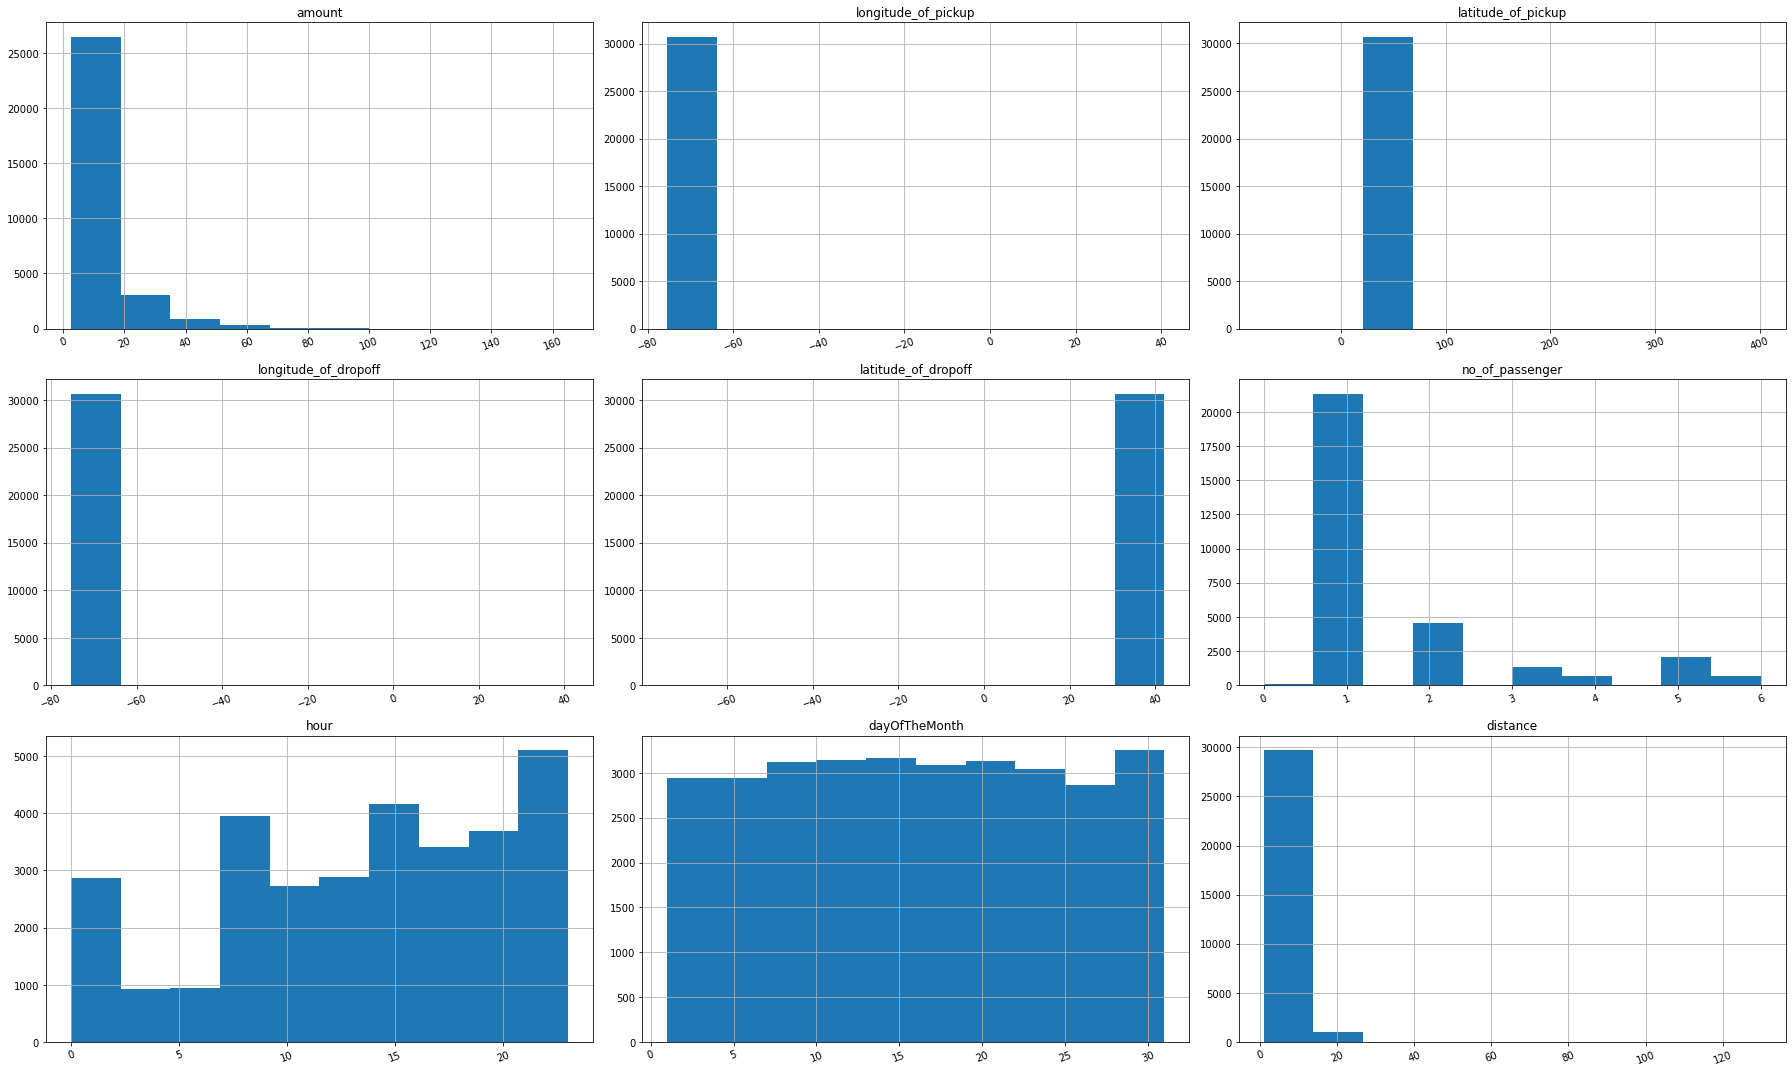

In [25]:
# Continuous Variables Plot
plt.rcParams['figure.figsize'] = [25,15] # Width, Height
continuousVars = trainRaw.columns[trainRaw.dtypes != object]

trainRaw[continuousVars].hist(xrot = 20) # We are using pandas hist() method for multiple histograms in one line of code

# Adjust the subplots (so that they dont overlap)
plt.tight_layout()


**no_of_passenger:** There are hardly trips with more than 2 people in the cabs.

**hour:** Evening-to-night traffic seems to be more.

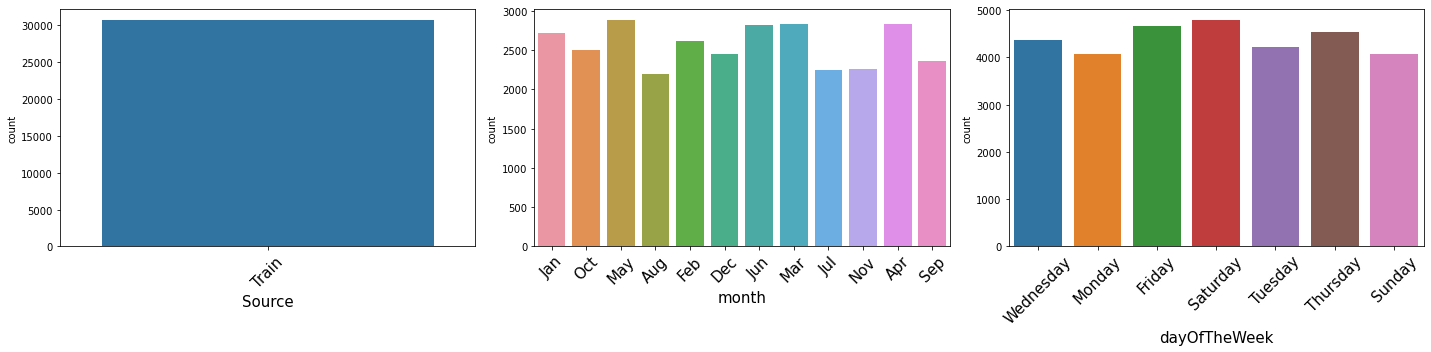

In [26]:
# Categorical Variables Plot
categoricalVars = trainRaw.columns[trainRaw.dtypes == object]
fig, ax = plt.subplots(1, 3, figsize = [20,5]) # Rows, Columns | figsize: Width, Height

for variable, subplot in zip(categoricalVars, ax.flatten()): # ax.faltten() to get a flat array
    
    plot  = sns.countplot(x = trainRaw[variable], ax = subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, fontsize = 15)
    plot.set_xlabel(variable, fontsize = 15) # Increase the fontsize of variable names in each plot

plt.tight_layout();

# Since the two independent categorical variables are somewhat "ordered" in nature, it makes sense to see the barplots
# with a some kind of sorted view like starting from Jan to Dec for month variable and 
# starting from Sunday to Saturday for dayOfTheweek variable. Lets try doing that.

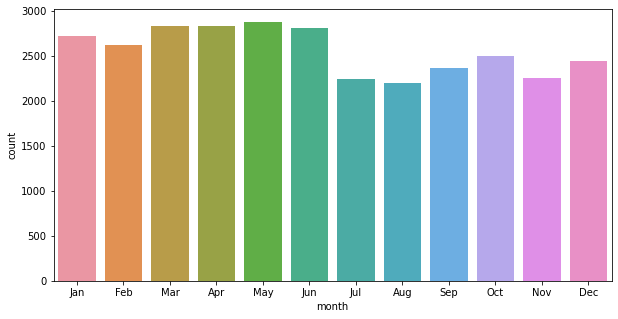

In [27]:
# In case you would like the months and days of the week in a sorted bar plot, we would first 
# need to introduce some "sorting" logic into the dataframe. For a categorical variable, its done using pd.Categorical()

# For "month" variable
monthsOrderedList = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
trainRaw["month"] = pd.Categorical(trainRaw["month"], categories = monthsOrderedList, ordered = True)
trainRaw.sort_values("month", inplace = True)

plt.rcParams['figure.figsize'] = [10,5] # Width, Height
sns.countplot(x = trainRaw["month"]);

# Its shows a gradual decrease in the traffic count as the year progresses. Could be an indicator that 
# month be taken as a continuous variable, starting with Jan = 1 and Dec = 12.

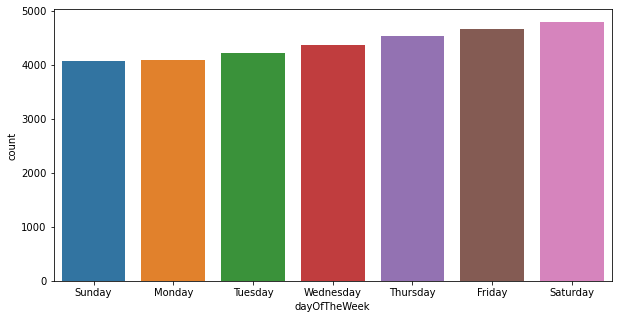

In [28]:
# For "dayOfTheWeek" variable
dayOfTheWeekOrderedList = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
trainRaw["dayOfTheWeek"] = pd.Categorical(trainRaw["dayOfTheWeek"], categories = dayOfTheWeekOrderedList, ordered = True)
trainRaw.sort_values("dayOfTheWeek", inplace = True)

plt.rcParams['figure.figsize'] = [10,5] # Width, Height
sns.countplot(x = trainRaw["dayOfTheWeek"]);

# Its shows a gradual increase in the traffic count as the week progresses. Could be an indicator that 
# dayOfTheWeek be taken as a continuous variable, starting with Sunday = 1 and Saturday = 7.

#### 3. Impact analysis for continuous and categorical data (Bivariate Analysis)

In [29]:
continuousVars = trainRaw.columns[trainRaw.dtypes != object]
print(continuousVars)

selectedContinuousVars = continuousVars[~continuousVars.str.contains("lat|long")]
selectedContinuousVars

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger', 'hour', 'dayOfTheMonth', 'month', 'dayOfTheWeek', 'distance'], dtype='object')


Index(['amount', 'no_of_passenger', 'hour', 'dayOfTheMonth', 'month', 'dayOfTheWeek', 'distance'], dtype='object')

In [30]:
~continuousVars.str.contains("lat|long")

array([ True, False, False, False, False,  True,  True,  True,  True,
        True,  True])

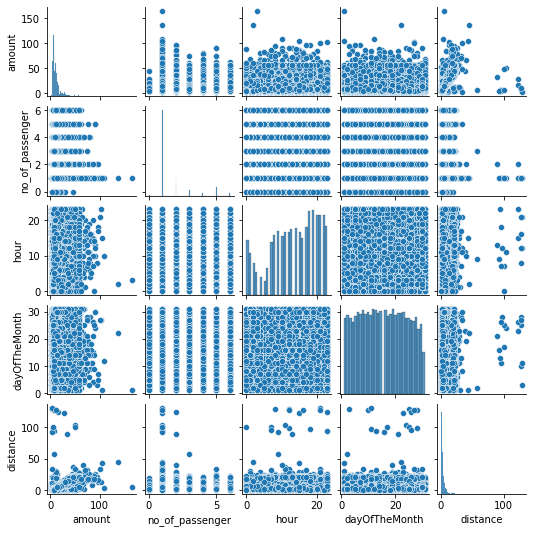

In [31]:
# Continuous Variables (Using Scatterplot)
sns.pairplot(trainRaw[selectedContinuousVars], height = 1.5); # height (in inches) controls the figure size here. figsize doesnt work for some reason.

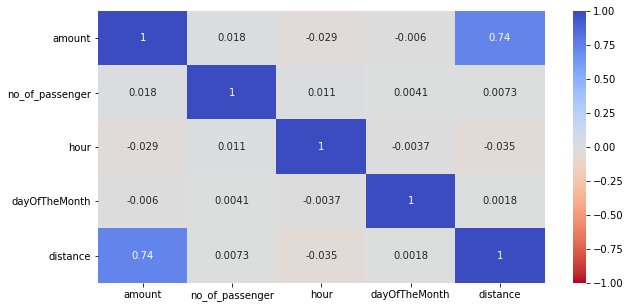

In [32]:
# Continuous Variables (Using Correlation Plot)

# corrDf = trainRaw.corr() # With all indep cont. variables
corrDf = trainRaw[selectedContinuousVars].corr() # With selected cont. variables

plt.figure(figsize = (10,5)) # width, heigth
sns.heatmap(corrDf, cmap='coolwarm_r', annot = True, vmin = -1, vmax = +1);
# vmin and vmax define the range of correlation (-1 to +1), which then drives the "intensity/magnitude" of the color


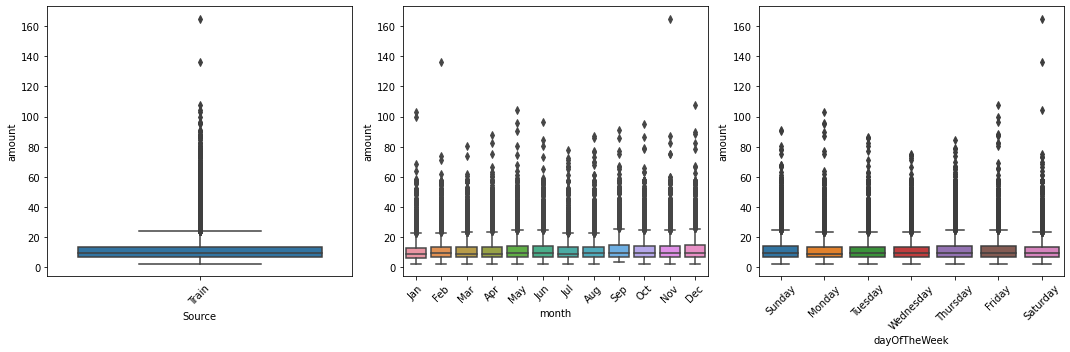

In [33]:
# Categorical Variables

fig, ax = plt.subplots(1, 3, figsize = (15,5)) 

for variable, subplot in zip(categoricalVars, ax.flatten()): # ax.faltten() to get a flat array
    
    plot  = sns.boxplot(y = trainRaw["amount"], x = trainRaw[variable], ax = subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

plt.tight_layout();

The boxplot range is too small because of outliers, it would be nice if we can set the ylimit to a lower number like 25 or 30 and check again to see if there is any significant differences in the categories of the indep variables. 

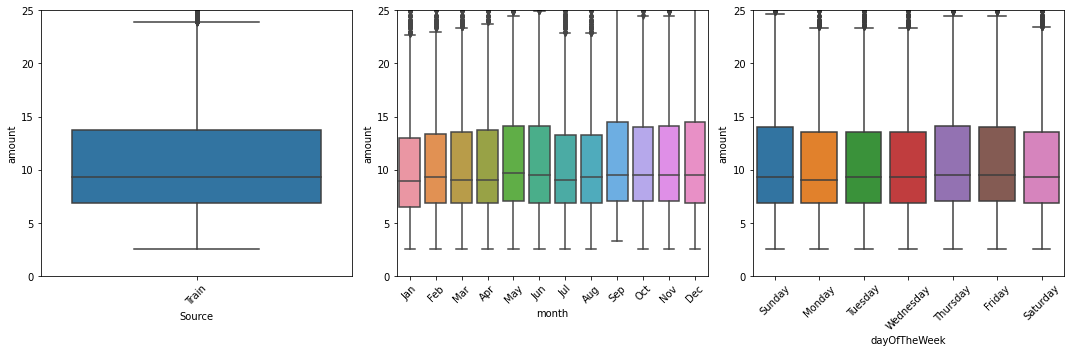

In [34]:
# Categorical Variables

fig, ax = plt.subplots(1, 3, figsize = (15,5)) 

for variable, subplot in zip(categoricalVars, ax.flatten()): # ax.faltten() to get a flat array
    
    plot  = sns.boxplot(y = trainRaw["amount"], x = trainRaw[variable], ax = subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plot.set_ylim(0,25) # Add ylim to restrict the y axis (amount) between a certain range

plt.tight_layout();

### DUMMY VARIABLE CREATION

In [35]:
# Lets create dummy variables out of the categorical variables

fullRaw2 = pd.get_dummies(fullRaw).copy() # 'Source'  column will change to "Source_Train" and "Source_Test"
# We need not drop the "nth" category in ML models as they dont get impacted by multicollinearity.
# Also, random forest logic picks a variable in one-by-one manner. Hence, its important to inlcude all possible variables.

print(fullRaw2.shape)
fullRaw2.head()

(40925, 30)


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,dayOfTheMonth,distance,Source_Test,Source_Train,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,dayOfTheWeek_Friday,dayOfTheWeek_Monday,dayOfTheWeek_Saturday,dayOfTheWeek_Sunday,dayOfTheWeek_Thursday,dayOfTheWeek_Tuesday,dayOfTheWeek_Wednesday
15187,7.0,-73.982478,40.751692,-73.995197,40.731588,1,16,1,2.477458,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
49026,45.0,-73.971218,40.759837,-73.791723,40.644835,1,15,5,19.798448,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
118,32.5,-73.872862,40.774105,-73.970593,40.764393,2,15,11,8.295557,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
46090,12.5,-73.988796,40.736502,-73.956793,40.766549,1,19,10,4.290327,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
31430,6.9,-73.984922,40.768653,-73.966285,40.764993,1,8,20,1.620422,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### SAMPLING

#### Divide the full dataset into train and test

In [36]:
# Step 1: Divide the full data

Train = fullRaw2[fullRaw2['Source_Train'] == 1].drop(['Source_Train', 'Source_Test'], axis = 1).copy()
Test = fullRaw2[fullRaw2['Source_Train'] == 0].drop(['Source_Train', 'Source_Test'], axis = 1).copy()

print(Train.shape)
print(Test.shape)


(30698, 28)
(10227, 28)


In [37]:
# Step 2: Extract independent variables (Xs) and dependent variables (Ys) into separate data objects

dependentVar = "amount"
trainX = Train.drop([dependentVar], axis = 1).copy()
trainY = Train[dependentVar].copy()
testX = Test.drop([dependentVar], axis = 1).copy()
testY = Test[dependentVar].copy()

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(30698, 27)
(30698,)
(10227, 27)
(10227,)


### MODEL BUILDING

#### Build Model (Iteration 1/ Trial 1: Build the model with default tuning parameter values)

In [38]:
M1 = RandomForestRegressor(random_state=123)
M1 = M1.fit(trainX, trainY) # Indep, Dep

#### Model Prediction on Testset

In [39]:
testPredDf = pd.DataFrame()

testPredDf["Prediction"] = M1.predict(testX)

# Create a column to store actuals
testPredDf["Actual"] = testY.values

# Validate if the above worked
testPredDf.head()

,Prediction,Actual
0,48.8404,45.0
1,11.5130,13.5
2,13.4540,14.0
3,12.2160,9.7
4,8.3320,10.0


#### Model Evaluation

In [40]:
# RMSE
print(np.sqrt(np.mean((testPredDf["Actual"] - testPredDf["Prediction"])**2)))
# This means on an "average", the taxi fare prediction would have +/- error of about $3.78
# Lower the RMSE, better the model prediction

# MAPE
print((np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)
# This means on an "average", the taxi fare prediction would have +/- error of ~19%
# Lower the MAPE, better the model prediction

3.781131603900922
18.693958848623513


#### Variable Importance Plot from RF Model

In [41]:
# Variable importance
# print(M1.feature_importances_)

varImpDf = pd.DataFrame()
varImpDf["Importance"] = M1.feature_importances_
varImpDf["Variable"] = trainX.columns
varImpDf.sort_values("Importance", ascending = False, inplace = True)

varImpDf.head()

,Importance,Variable
7,0.823872,distance
2,0.046123,longitude_of_dropoff
0,0.029363,longitude_of_pickup
3,0.028831,latitude_of_dropoff
1,0.018084,latitude_of_pickup


In [42]:
print(M1.feature_importances_)
print(trainX.columns)

[2.93631599e-02 1.80835054e-02 4.61233619e-02 2.88312256e-02
 3.23026137e-03 1.25818661e-02 1.33159821e-02 8.23871520e-01
 1.15382735e-03 8.81913368e-04 1.40931642e-03 1.20335923e-03
 9.02369560e-04 7.99755191e-04 1.22254351e-03 8.63617948e-04
 1.17803212e-03 1.33804816e-03 1.05171510e-03 2.56944415e-03
 1.57878704e-03 1.37490837e-03 1.53433280e-03 1.32228574e-03
 1.36294402e-03 1.48989499e-03 1.36202248e-03]
Index(['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger', 'hour', 'dayOfTheMonth', 'distance', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'dayOfTheWeek_Friday', 'dayOfTheWeek_Monday', 'dayOfTheWeek_Saturday', 'dayOfTheWeek_Sunday', 'dayOfTheWeek_Thursday', 'dayOfTheWeek_Tuesday', 'dayOfTheWeek_Wednesday'], dtype='object')


In [43]:
varImpDf["Importance"].median()

0.0013749083726883025

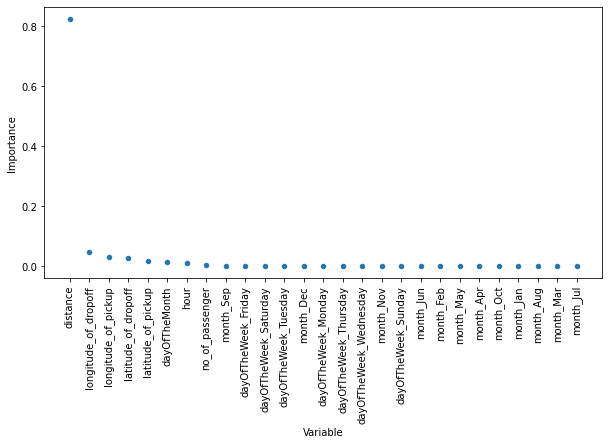

In [44]:
plt.rcParams['figure.figsize'] = [10,5] # Width, Height
varImpDf.plot(x = "Variable", y = "Importance", kind = "scatter", rot = 90);

In [45]:
M2 = RandomForestRegressor(n_estimators = 150, max_features = 7, min_samples_leaf = 5, random_state = 123)
M2 = M2.fit(trainX, trainY) # Indep, Dep

In [46]:
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = M2.predict(testX)
testPredDf["Actual"] = testY.values

print(np.sqrt(np.mean((testPredDf["Actual"] - testPredDf["Prediction"])**2)))
print((np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

3.7370059916752725
18.548164237772873


RMSE and MAPE reduced a little bit. But how do we know these are the "best" hyperparameter values? Well, GridSearch will allow us to answer this question.

### GRID SEARCH WITH CROSS VALIDATION

In [56]:
myParamGrid = {
    'n_estimators': [200, 250],
    'max_features': [7, 9, 11],
    'min_samples_leaf': [2, 3, 5, 10]
} 

gridSearchModels = GridSearchCV(
    estimator = RandomForestRegressor(random_state = 123, n_jobs = -1), # n_jobs = -1 for parallelization
    param_grid = myParamGrid,  # param_grid is a dictionary
    scoring = 'neg_mean_absolute_percentage_error', 
    cv=3).fit(trainX, trainY) 

# Other scoring parameters are available here: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
gridSearchModelsEvalDf = pd.DataFrame.from_dict(gridSearchModels.cv_results_)


In [57]:
gridSearchModelsEvalDf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.775345,1.642334,0.153289,0.018088,7,2,200,"{'max_features': 7, 'min_samples_leaf': 2, 'n_...",-0.190066,-0.187919,-0.191174,-0.189720,0.001351,16
1,5.346040,0.827293,0.252240,0.054649,7,2,250,"{'max_features': 7, 'min_samples_leaf': 2, 'n_...",-0.190001,-0.187547,-0.191311,-0.189620,0.001560,15
2,3.572924,0.240142,0.156754,0.015490,7,3,200,"{'max_features': 7, 'min_samples_leaf': 3, 'n_...",-0.190160,-0.187807,-0.191932,-0.189966,0.001689,18
3,4.659772,0.041638,0.180849,0.006140,7,3,250,"{'max_features': 7, 'min_samples_leaf': 3, 'n_...",-0.190239,-0.187533,-0.191765,-0.189845,0.001750,17
4,3.152474,0.117335,0.126806,0.016066,7,5,200,"{'max_features': 7, 'min_samples_leaf': 5, 'n_...",-0.191750,-0.188447,-0.193581,-0.191259,0.002125,22
5,3.708915,0.028513,0.138800,0.009050,7,5,250,"{'max_features': 7, 'min_samples_leaf': 5, 'n_...",-0.191553,-0.188350,-0.193466,-0.191123,0.002111,21
6,2.717931,0.045296,0.101944,0.007018,7,10,200,"{'max_features': 7, 'min_samples_leaf': 10, 'n...",-0.194534,-0.191105,-0.196557,-0.194065,0.002250,24
7,3.533827,0.214864,0.135175,0.012895,7,10,250,"{'max_features': 7, 'min_samples_leaf': 10, 'n...",-0.194629,-0.190891,-0.196336,-0.193952,0.002274,23
8,4.334286,0.033666,0.159580,0.007774,9,2,200,"{'max_features': 9, 'min_samples_leaf': 2, 'n_...",-0.187462,-0.186050,-0.189962,-0.187825,0.001618,10
9,5.333541,0.016234,0.184998,0.009567,9,2,250,"{'max_features': 9, 'min_samples_leaf': 2, 'n_...",-0.187437,-0.185922,-0.189821,-0.187727,0.001605,9


In [58]:
gridSearchModelsEvalDf.to_csv("gridSearchModelsEvalDf.csv")

In [59]:
import os
os.getcwd()

'C:\\Users\\rahul\\Documents\\IMR\\PGDA\\Datasets\\Random_Forest'

#### Build final model with best hyperparameters found through grid search 

In [60]:
M3 = RandomForestRegressor(n_estimators = 250, max_features = 11, min_samples_leaf = 3, random_state = 123)
M3 = M3.fit(trainX, trainY) # Indep, Dep

In [61]:
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = M3.predict(testX)
testPredDf["Actual"] = testY.values

print(np.sqrt(np.mean((testPredDf["Actual"] - testPredDf["Prediction"])**2)))
print((np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

3.6881924571841607
18.117861915616484


RMSE and MAPE reduced even further.

#### Linear Regression Model Comparison

In [47]:
from statsmodels.api import add_constant, OLS

In [48]:
fullRaw2 = pd.get_dummies(fullRaw, drop_first = True).copy()

Train = fullRaw2[fullRaw2['Source_Train'] == 1].drop(['Source_Train'], axis = 1).copy()
Test = fullRaw2[fullRaw2['Source_Train'] == 0].drop(['Source_Train'], axis = 1).copy()

dependentVar = "amount"
trainX = Train.drop([dependentVar], axis = 1).copy()
trainY = Train[dependentVar].copy()
testX = Test.drop([dependentVar], axis = 1).copy()
testY = Test[dependentVar].copy()

trainX = add_constant(trainX)
testX = add_constant(testX)

linRegModel = OLS(trainY, trainX).fit()

testPredDf = pd.DataFrame()
testPredDf["Prediction"] = linRegModel.predict(testX)
testPredDf["Actual"] = testY.values

print(np.sqrt(np.mean((testPredDf["Actual"] - testPredDf["Prediction"])**2)))
print((np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)


6.378788120173923
29.281811115810918


In [ ]:
!pip install mlxtend

In [49]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression # Same as OLS() but LinearRegression() doesnt provide p-values

In [50]:
# Linear Regression
avgExpectedLoss, avgBias, avgVar = bias_variance_decomp(
    LinearRegression(), trainX.values, trainY.values, testX.values, testY.values, 
    num_rounds = 25, loss = 'mse', random_seed = 123) # The function doesnt accept pandas df, hence, need to use .values (array)

print(f"Avg. Expected Error: {avgExpectedLoss}")
print(f"Avg. Bias: {avgBias}")
print(f"Avg. Variance: {avgVar}")

# Linear Regression is a simple algorithm, hence, it produces high bias - low variance models

Avg. Expected Error: 41.20451131118972
Avg. Bias: 40.706216011490305
Avg. Variance: 0.4982952996994093


In [51]:
# Decision Tree Regressor
avgExpectedLoss, avgBias, avgVar = bias_variance_decomp(
    DecisionTreeRegressor(), trainX.values, trainY.values, testX.values, testY.values, 
    num_rounds = 25, loss = 'mse', random_seed = 123) # The function doesnt accept pandas df, hence, need to use .values (array)

print(f"Avg. Expected Error: {avgExpectedLoss}")
print(f"Avg. Bias: {avgBias}")
print(f"Avg. Variance: {avgVar}")

# Decision Trees are usually better "predictive" models than linear regression as the "Avg Expected Error" is quite lower than
# Linear Regression model, but Decision Trees suffer quite a bit from high-variance

Avg. Expected Error: 27.86248541194876
Avg. Bias: 14.579721387026497
Avg. Variance: 13.282764024922262


In [52]:
# Random Forest Regressor
avgExpectedLoss, avgBias, avgVar = bias_variance_decomp(
    RandomForestRegressor(), trainX.values, trainY.values, testX.values, testY.values, 
    num_rounds = 5, loss = 'mse', random_seed = 123) # The function doesnt accept pandas df, hence, need to use .values (array)

print(f"Avg. Expected Error: {avgExpectedLoss}")
print(f"Avg. Bias: {avgBias}")
print(f"Avg. Variance: {avgVar}")

# Random Forest is complex algorithm, hence it reduces the "Avg. Expected Error" by a significant margin and it maintains
# a very low variance because of the multiple trees - as an "averaged" prediction comes from NOT one tree but multiple
# trees. Error in RF model is mostly due to high bias, which would be dealt with if there are more relevant features added.

Avg. Expected Error: 14.938487971239464
Avg. Bias: 14.043881349021259
Avg. Variance: 0.8946066222182065
